# Churn Reduction Analysis

In [1]:
%matplotlib inline 
from IPython.display import Image
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [56]:
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn import ensemble
from sklearn import neighbors
from sklearn import preprocessing
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn import svm
from sklearn import linear_model
from sklearn import metrics

In [42]:
customer_df = pd.read_csv('churn_train_data.csv')
target = customer_df['Churn']
states_ = customer_df['state']

In [43]:
customer_df.head(3)

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,number customer service calls,Churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.


In [44]:
customer_df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,number customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [45]:
customer_df.drop('phone number',axis = 1, inplace = True) #dropping the unique values 

Data Precprocessing

In [46]:
label_encoder = preprocessing.LabelEncoder()

In [47]:
# State is string and we want discreet integer values
customer_df['state'] = label_encoder.fit_transform(customer_df['state'])
customer_df['international plan'] = label_encoder.fit_transform(customer_df['international plan'])
customer_df['voice mail plan'] = label_encoder.fit_transform(customer_df['voice mail plan'])
customer_df['Churn'] = label_encoder.fit_transform(customer_df['Churn'])

# Correlation Heatmap

BI-Variate Analysis

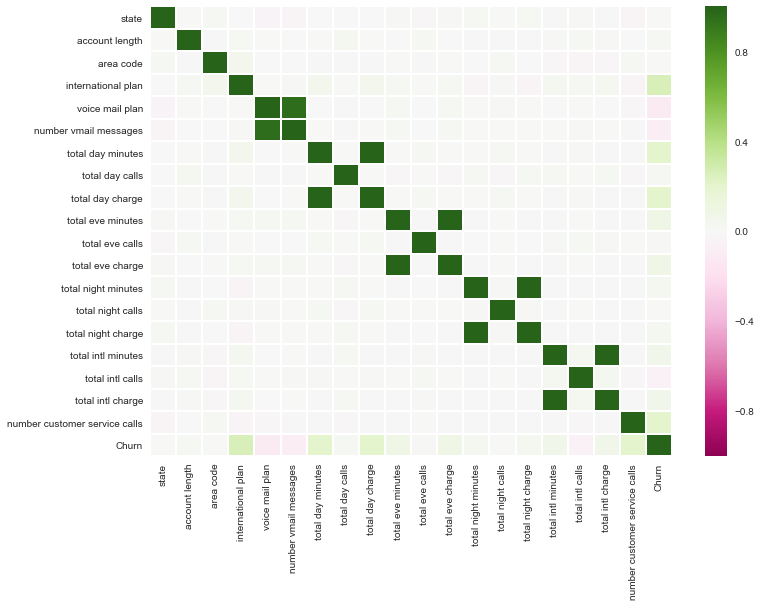

In [9]:
correlations = customer_df.corr()
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.heatmap(correlations,cmap="PiYG",ax=ax,linecolor='white',linewidths=1)
fig.savefig("heatmap.png")

In [10]:
#dropping redundant variables
customer_df.drop(['number vmail messages','total day charge','total eve charge','total night charge','total intl charge'],axis = 1, inplace = True)

BI-Variate Analysis for Target Class


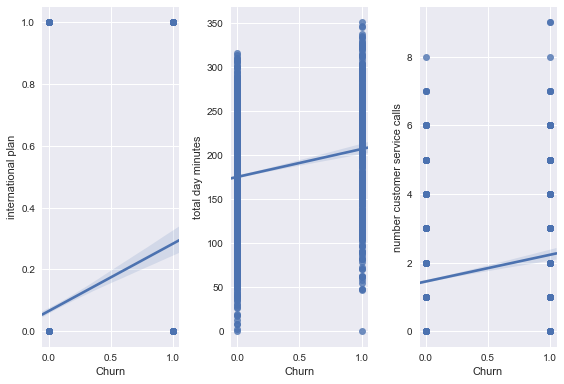

In [11]:
l = ['international plan','total day minutes','number customer service calls']
for i in range(0,3):
    plt.subplot(1,3,i+1)
    target_plot = sns.regplot(x = 'Churn', y = l[i], data = customer_df)
    plt.tight_layout()

Conclusion: Three important parameters for Churning i) International Plan ii) Total Day Minutes iii) Number of Customer Service Calls

 # Geographical Plotting


Mapping variables for geographical plotting


In [12]:
states = states_.value_counts()
state_ls = list(states.index)
state_vs = list(states.values)

libraries required for a geographical plotting


In [13]:
import plotly.plotly as py
import plotly.graph_objs as go 
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

environment setup for the figures to show up in the notebook:

In [14]:
init_notebook_mode(connected=True) 

variable of dictionary type to pass into the choromap


In [15]:
data = dict(type='choropleth',
            colorscale = 'Picnic',
            locations = state_ls,
            z = state_vs,
            locationmode = 'USA-states',
            text = target,
            marker = dict(line = dict(color = 'rgb(255,255,255)',width = 2)),
            colorbar = {'title':"Total Customers"}
            )

specifications for the layout

In [16]:
layout = dict(title = 'US Customers Heatmap by State',
              geo = dict(scope='usa'))

parameters passing into the choromap


In [17]:
choromap = go.Figure(data = [data],layout = layout)

command plotting the choromap

In [18]:
iplot(choromap)

Conclusions:
i) WV(West Virginia) has a higest of 158 Customers
ii) CA (California) has the least 52 Customers

This concludes of a target class imbalance on the dataset

# Pairplots for plotting relations

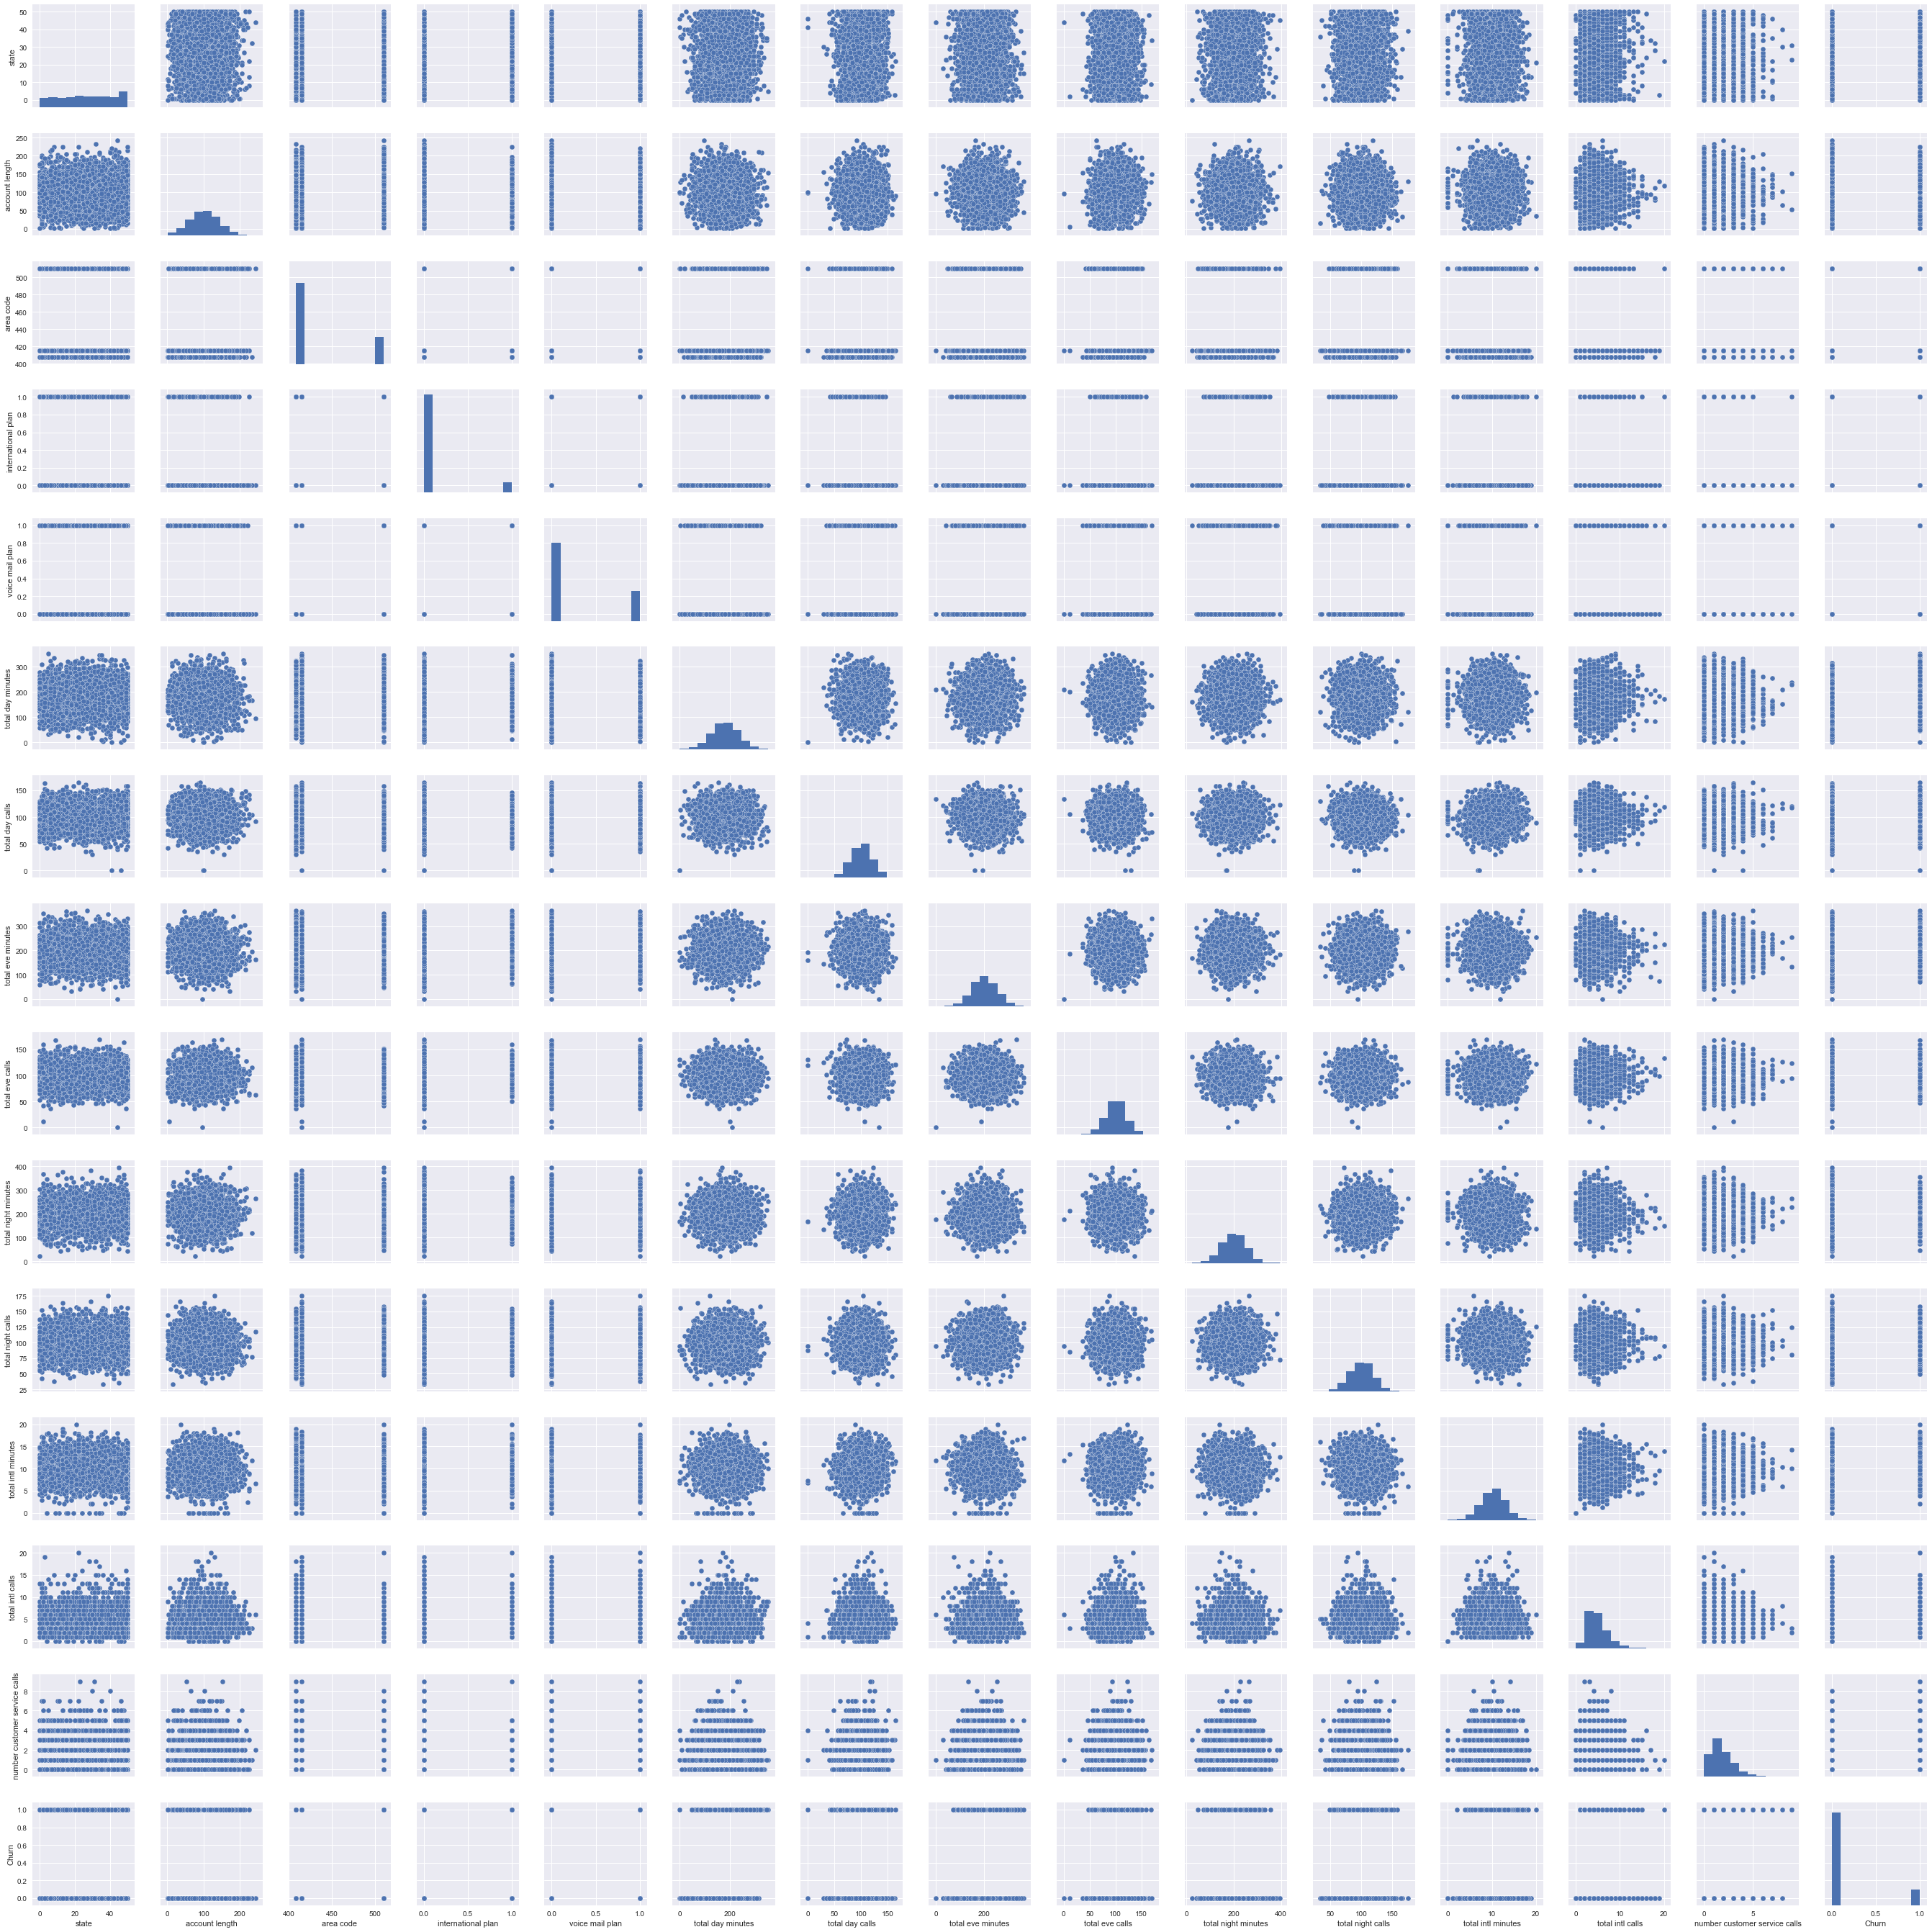

In [204]:
sns.pairplot(customer_df,palette='coolwarm',size = 2.5)

# Target Class Distribution

In [19]:
dv = target.value_counts()
dv = pd.DataFrame(dv)
dv.reset_index(inplace = True)
dv

,index,Churn
0,False.,2850
1,True.,483


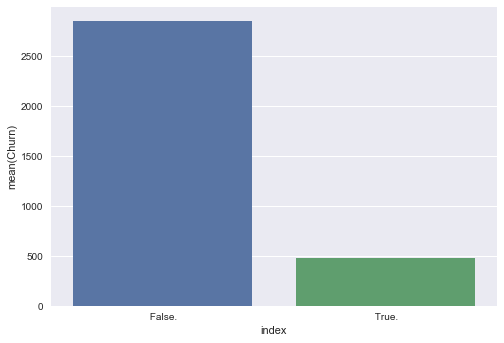

In [20]:
sns.barplot(x = dv['index'],y = dv['Churn'])

# Model Development

Train Test Split Validation

In [48]:
X_imb = customer_df.drop('Churn',axis = 1)
y_imb = customer_df['Churn']

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X_imb, y_imb, test_size=0.3, random_state=101) #Test,train split using sklearn

#model instances
model_dt_imb = DecisionTreeClassifier()
model_KNN_imb = KNeighborsClassifier()
model_Log_imb= LogisticRegression()
model_RF_imb = RandomForestClassifier(n_estimators=100)


#model training
model_dt_imb.fit(X_train,y_train)
model_KNN_imb.fit(X_train,y_train)
model_Log_imb.fit(X_train,y_train)
model_RF_imb.fit(X_train,y_train)

#model predictions
pred_dt_imb = model_dt_imb.predict(X_test)
pred_KNN_imb = model_KNN_imb.predict(X_test)
pred_Log_imb = model_Log_imb.predict(X_test)
pred_RF_imb = model_RF_imb.predict(X_test)

Decision_Trees
             precision    recall  f1-score   support

          0       0.95      0.91      0.93       869
          1       0.54      0.69      0.61       131

avg / total       0.90      0.88      0.89      1000



[[793  76]
 [ 41  90]]
KNN
             precision    recall  f1-score   support

          0       0.89      0.98      0.94       869
          1       0.65      0.21      0.32       131

avg / total       0.86      0.88      0.86      1000



[[854  15]
 [103  28]]
Logistic
             precision    recall  f1-score   support

          0       0.88      0.97      0.92       869
          1       0.40      0.13      0.20       131

avg / total       0.82      0.86      0.83      1000



[[843  26]
 [114  17]]
RF
             precision    recall  f1-score   support

          0       0.95      0.99      0.97       869
          1       0.91      0.66      0.77       131

avg / total       0.95      0.95      0.94      1000



[[860   9]
 [ 44  87]]


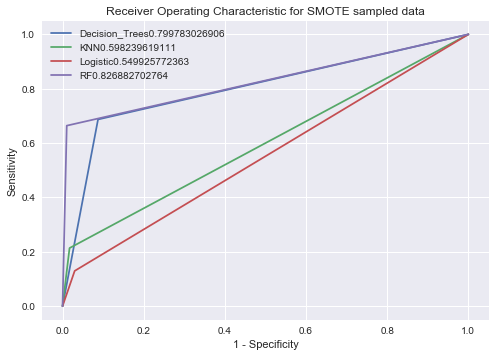

In [58]:
model_predictions = [pred_dt_imb,pred_KNN_imb,pred_Log_imb,pred_RF_imb] #list for every models predictions
models = ['Decision_Trees','KNN','Logistic','RF'] #list to specify the model names

#looping multiple models for plotting a single ROC Curve to evaluate models performance
for plots in range(0,4):
    fpr, tpr, thresh = metrics.roc_curve(y_test, model_predictions[plots])
    auc = metrics.roc_auc_score(y_test, model_predictions[plots])
    plt.plot(fpr,tpr,label=models[plots]+str(auc))
    plt.legend(loc=0)
    plt.xlabel('1 - Specificity')
    plt.ylabel('Sensitivity')
    plt.title('Receiver Operating Characteristic for SMOTE sampled data')
    print(models[plots])
    print(classification_report(y_test,model_predictions[plots]))
    print('\n')
    print(confusion_matrix(y_test,model_predictions[plots]))
    plt.savefig('Imb_ROC.png')

Cross Validation Approach

Converting the series type into a matrix form

In [21]:
y = customer_df['Churn'].as_matrix().astype(np.int)
y.size

3333

Dropping the target value for a response vector matrix

In [22]:
customer_df.drop(["Churn"], axis = 1, inplace=True)

Creating feature matrix

In [23]:
X = customer_df.as_matrix().astype(np.float)
X.shape

(3333, 14)

Scaling the variables

In [24]:
scaler = preprocessing.StandardScaler()
X = scaler.fit_transform(X)

Stratified Sampling for Target Class Imbalance

In [25]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=10) #these are the no of folds for the stratified sampling
skf.get_n_splits(X, y)

10

list of all ensemble methods

In [26]:
ensembles = [ensemble.GradientBoostingClassifier(),svm.SVC(),ensemble.RandomForestClassifier(),neighbors.KNeighborsClassifier(),
            LogisticRegression()]

In [27]:
method = ['GBM','SVM','Random Forest','KNN','Logistic Regression']

In [34]:
y_pred = y.copy()

GBM
             precision    recall  f1-score   support

          0       0.96      0.99      0.97      2850
          1       0.92      0.73      0.82       483

avg / total       0.95      0.95      0.95      3333

SVM
             precision    recall  f1-score   support

          0       0.92      0.99      0.95      2850
          1       0.88      0.48      0.62       483

avg / total       0.91      0.92      0.90      3333

Random Forest
             precision    recall  f1-score   support

          0       0.93      0.99      0.96      2850
          1       0.91      0.57      0.70       483

avg / total       0.93      0.93      0.92      3333

KNN
             precision    recall  f1-score   support

          0       0.89      0.98      0.94      2850
          1       0.78      0.31      0.45       483

avg / total       0.88      0.89      0.87      3333

Logistic Regression
             precision    recall  f1-score   support

          0       0.88      0.97      0.

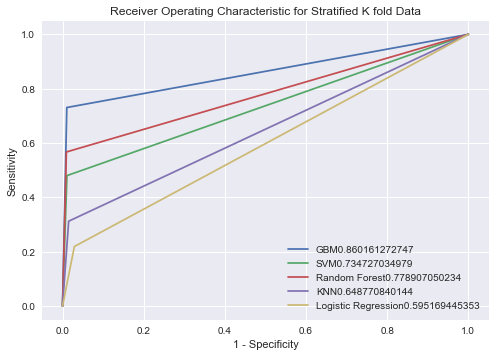

In [60]:
for methods in range(0,5):
    for train_index, test_index in skf.split(X, y):
        
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        clf = ensembles[methods]
        clf.fit(X_train,y_train)
        y_pred[test_index] = clf.predict(X_test)
    print(method[methods])
    print(classification_report(y,y_pred))
    fpr, tpr, thresh = metrics.roc_curve(y, y_pred)
    auc = metrics.roc_auc_score(y, y_pred)
    plt.plot(fpr,tpr,label=method[methods]+str(auc))
    plt.legend(loc=0)
    plt.xlabel('1 - Specificity')
    plt.ylabel('Sensitivity')
    plt.title('Receiver Operating Characteristic for Stratified K folding')
    plt.savefig('_ROC.png')
  

# Final Model Selection

In [37]:
gb_model = ensemble.GradientBoostingClassifier()
gb_model.fit(X,y)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [ ]:
vars_ = (pd.Series(gb_model.feature_importances_, index=customer_df.columns)
   .nlargest(15)
   .plot(kind='barh'))
plt.savefig('varz_imp.png')

The important variables for the churn are:

1. Total Day, Eve and International Minutes which relates with respective charges
2. Number of Customer Service Calls

The company should optimize these parameters to reduce the Customer Churn